# Plotting zonal means

In obrero we have created a small little function that will take care of most things when plotting zonal mean line plots. Let's import the library:

In [1]:
# small hack to be able to import module without install
import os
import sys
sys.path.append(os.getcwd() + '/../')

import obrero
import obrero.plot as oplot

Now we read some data:

In [2]:
# file name
f1 = 'data/ctl.nc'

# read as data array
da = obrero.read_nc(f1, 'pr')

# convert units
da.convert_units('mm day-1')

We calculate the zonal mean using also obrero functions. In this case this data set has multiple times, so we will average them all to have a single zonal mean:

In [3]:
zm = obrero.get_zonal_means(da, time_mean=True)
zm

<xarray.DataArray 'pr' (latitude: 32)>
array([0.694918, 0.782554, 1.034458, 1.586653, 2.146629, 2.481465, 2.509852,
       2.443587, 2.313014, 2.209716, 2.270461, 2.397924, 2.90228 , 3.852706,
       4.575459, 5.175932, 5.1249  , 4.130602, 3.277799, 2.833432, 2.364152,
       2.089811, 2.231238, 2.71634 , 3.087145, 2.91713 , 1.804581, 1.417451,
       1.437023, 0.65069 , 0.385693, 0.537117], dtype=float32)
Coordinates:
  * latitude  (latitude) float64 85.76 80.27 74.74 ... -74.74 -80.27 -85.76
Attributes:
    standard_name:  total_precipitation
    long_name:      total_precipitation
    units:          mm day-1
    code:           260

This is a simple line plot, but obrero will take care of the axes creation and labeling and all that fun stuff. The function is called `plot_zonal_mean()` and is part of the `obrero.plot` module. We can specify a line style using a dictionary:

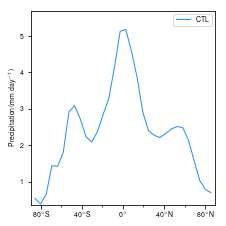

In [6]:
%matplotlib inline
sty = dict(linestyle='-', color='DodgerBlue', linewidth=1.0, label='CTL')
spec = dict(style=sty, ylabel=r'Precipitation (mm day$^{-1}$)', wmm=80, hmm=80)
ax = oplot.plot_zonal_mean(zm, **spec)

If we had several lines we want to plot in the same axes, we must use lists for both data and styles. So let's read more data and compare:

In [10]:
# file name
f2 = 'data/gpcp_t21.nc'

# read as data array
da = obrero.read_nc(f2, 'tp')

# zonal mean
zm2 = obrero.get_zonal_means(da, time_mean=True)

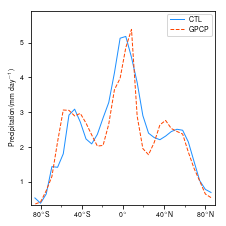

In [12]:
sty2 = dict(linestyle='--', color='OrangeRed', linewidth=1.0, label='GPCP')
spec2 = dict(style=[sty, sty2], ylabel=r'Precipitation (mm day$^{-1}$)', wmm=80, hmm=80)
ax2 = oplot.plot_zonal_mean([zm, zm2], **spec2)